# KNN FOR STOCK PRICE PREDICTION (TIME SERIES)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Read Data from CSV file And Store It IN DATAFRAME
df = pd.read_csv('Datas/NSE-TATAGLOBAL.csv')

#print TOP 5 RECORD
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2019-01-04,210.60,214.90,210.00,213.50,213.80,1213181.0,2583.05
1,2019-01-03,214.95,215.35,209.90,210.55,210.05,2096553.0,4433.50
2,2019-01-02,219.00,220.35,213.60,214.20,214.60,1081778.0,2340.31
3,2019-01-01,219.95,221.05,218.05,218.95,219.10,716275.0,1571.63
4,2018-12-31,222.00,223.65,218.85,219.55,219.40,965858.0,2131.09


In [3]:
# Data Frame Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 8 columns):
Date                    2100 non-null object
Open                    2100 non-null float64
High                    2100 non-null float64
Low                     2100 non-null float64
Last                    2100 non-null float64
Close                   2100 non-null float64
Total Trade Quantity    2100 non-null float64
Turnover (Lacs)         2100 non-null float64
dtypes: float64(7), object(1)
memory usage: 131.4+ KB


In [4]:
# DATA CLEANING 
# CHECK ANY NULL VALUE IS PRESENT OR NOT
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [5]:
# CHECK ANY VALUE IS MISSING OR NOT
df.isna().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [6]:
# Convert Date Column data type Object to Year-Month-day
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')

#setting index as date
df.index = df['Date']

df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2019-01-04,2019-01-04,210.60,214.90,210.00,213.50,213.80,1213181.0,2583.05
2019-01-03,2019-01-03,214.95,215.35,209.90,210.55,210.05,2096553.0,4433.50
2019-01-02,2019-01-02,219.00,220.35,213.60,214.20,214.60,1081778.0,2340.31
2019-01-01,2019-01-01,219.95,221.05,218.05,218.95,219.10,716275.0,1571.63
2018-12-31,2018-12-31,222.00,223.65,218.85,219.55,219.40,965858.0,2131.09


In [7]:
# SORT DATA FRAME BY INDEX ASENDING ORDER
df = df.sort_index()

print('AFTER SORTING BY DATE(INDEX) ASC ORDER')
df.head()

AFTER SORTING BY DATE(INDEX) ASC ORDER


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2010-07-21,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666.0,803.56
2010-07-22,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312.0,355.17
2010-07-23,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312.0,340.31
2010-07-26,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440.0,780.01
2010-07-27,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100.0,694.98


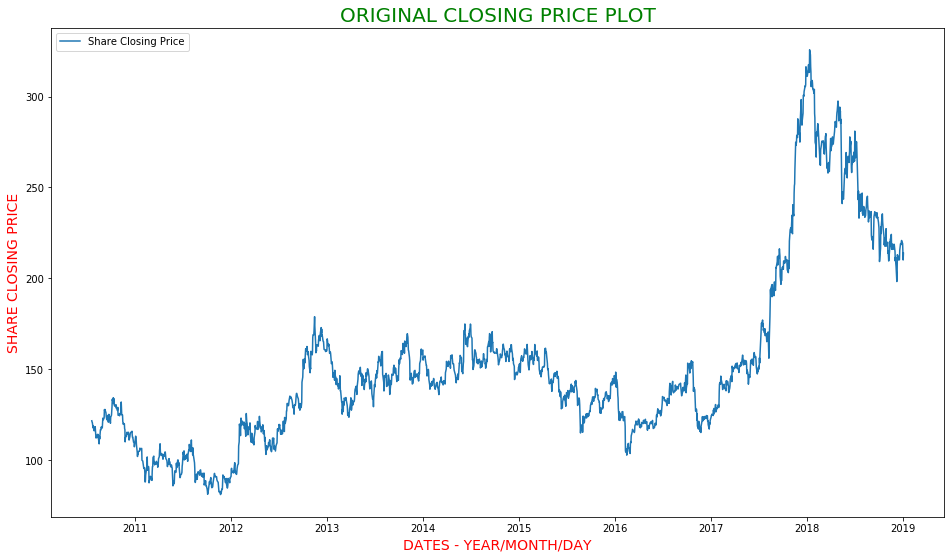

In [8]:
from pandas.plotting import register_matplotlib_converters

pd.plotting.register_matplotlib_converters()

# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(df['Close'], label='Share Closing Price')

ax.set_xlabel('DATES - YEAR/MONTH/DAY',fontsize=14, color='r')
ax.set_ylabel('SHARE CLOSING PRICE',fontsize=14, color='r')
ax.set_title('ORIGINAL CLOSING PRICE PLOT', fontsize=20, color='g')
ax.legend()

SHARE PRICE WILL CHANGE ON DIFFERENT CIRCUMSTANCE - SO WE WILL NOT REMOVE OUTLIER VALUE


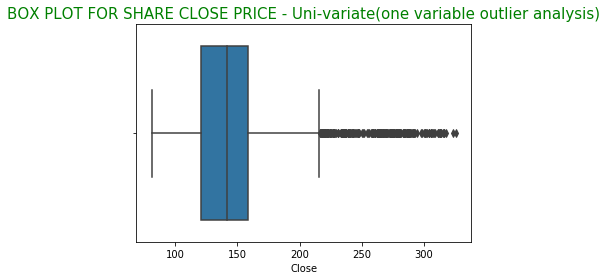

In [9]:
sns.boxplot(x=df['Close'])

plt.title('BOX PLOT FOR SHARE CLOSE PRICE - Uni-variate(one variable outlier analysis)', fontsize=15, color='g')

print('SHARE PRICE WILL CHANGE ON DIFFERENT CIRCUMSTANCE - SO WE WILL NOT REMOVE OUTLIER VALUE')

In [10]:
df1 =  df.loc[:,['Date','Close']]
df1.index = range(len(df))
df1.head()

,Date,Close
0,2010-07-21,121.55
1,2010-07-22,120.90
2,2010-07-23,120.65
3,2010-07-26,117.60
4,2010-07-27,118.65


# FEATURE EXTRACTING

In [11]:
# FEATURE EXTRACTING
column_1 = df1.iloc[:,0]
column_2 = df1.iloc[:,1]

#print (column_2)
new_data1 = pd.DataFrame({"year": column_1.dt.year,
              "month": column_1.dt.month,
              "day": column_1.dt.day,
              "dayofyear": column_1.dt.dayofyear,
              "weekofyear": column_1.dt.weekofyear,
              "dayofweek": column_1.dt.dayofweek,
              "weekday": column_1.dt.weekday,
              "quarter": column_1.dt.quarter,
              "Close": column_2,
              "Date": column_1,
             })

new_data1.head()

,year,month,day,dayofyear,weekofyear,dayofweek,weekday,quarter,Close,Date
0,2010,7,21,202,29,2,2,3,121.55,2010-07-21
1,2010,7,22,203,29,3,3,3,120.90,2010-07-22
2,2010,7,23,204,29,4,4,3,120.65,2010-07-23
3,2010,7,26,207,30,0,0,3,117.60,2010-07-26
4,2010,7,27,208,30,1,1,3,118.65,2010-07-27


# ADDING NEW FEATURE..ASSUME MONDAY & FRIDAY STOCK PRICE MAY BE HIGH..

In [12]:
# Set 0 to mon_fri Column
new_data1['mon_fri'] = 0 

# FOR MONDAY SET VALUE 1
new_data1.loc[new_data1.dayofweek == 0, 'mon_fri'] = 1

# FOR FRIDAY SET VALUE 1
new_data1.loc[new_data1.dayofweek == 4, 'mon_fri'] = 1

new_data1.head(10)

,year,month,day,dayofyear,weekofyear,dayofweek,weekday,quarter,Close,Date,mon_fri
0,2010,7,21,202,29,2,2,3,121.55,2010-07-21,0
1,2010,7,22,203,29,3,3,3,120.90,2010-07-22,0
2,2010,7,23,204,29,4,4,3,120.65,2010-07-23,1
3,2010,7,26,207,30,0,0,3,117.60,2010-07-26,1
4,2010,7,27,208,30,1,1,3,118.65,2010-07-27,0
5,2010,7,28,209,30,2,2,3,118.25,2010-07-28,0
6,2010,7,29,210,30,3,3,3,116.60,2010-07-29,0
7,2010,7,30,211,30,4,4,3,116.05,2010-07-30,1
8,2010,8,2,214,31,0,0,3,117.30,2010-08-02,1
9,2010,8,3,215,31,1,1,3,118.30,2010-08-03,0


In [13]:
new_data1.describe().T

,count,mean,std,min,25%,50%,75%,max
year,2100.0,2014.255714,2.458196,2010.00,2012.00,2014.00,2016.0000,2019.00
month,2100.0,6.659048,3.459276,1.00,4.00,7.00,10.0000,12.00
day,2100.0,15.788571,8.811783,1.00,8.00,16.00,23.0000,31.00
dayofyear,2100.0,187.325714,105.851013,1.00,96.00,191.50,279.0000,366.00
weekofyear,2100.0,27.143333,15.104399,1.00,14.00,28.00,40.0000,53.00
dayofweek,2100.0,2.003333,1.425785,0.00,1.00,2.00,3.0000,6.00
weekday,2100.0,2.003333,1.425785,0.00,1.00,2.00,3.0000,6.00
quarter,2100.0,2.550000,1.117608,1.00,2.00,3.00,4.0000,4.00
Close,2100.0,151.561595,49.401844,80.95,120.55,141.95,158.7625,325.75
mon_fri,2100.0,0.397143,0.489423,0.00,0.00,0.00,1.0000,1.00


In [14]:
corr=new_data1.corr()
corr.nlargest(12,'Close')['Close']

Close         1.000000
year          0.706233
quarter       0.056071
month         0.045813
weekofyear    0.045058
dayofyear     0.043714
mon_fri      -0.000505
dayofweek    -0.004091
weekday      -0.004091
day          -0.014537
Name: Close, dtype: float64

In [15]:
print('VIEW CORELATION MATRIX ')

# PRINT CORELATION MATRIX USING COLOR
corr.style.background_gradient()

VIEW CORELATION MATRIX 


,year,month,day,dayofyear,weekofyear,dayofweek,weekday,quarter,Close,mon_fri
year,1,-0.0929412,-0.0145483,-0.0939293,-0.088304,-0.00336972,-0.00336972,-0.0902355,0.706233,-0.00446114
month,-0.0929412,1,0.0221876,0.996528,0.97574,0.000423724,0.000423724,0.971759,0.0458135,0.0071346
day,-0.0145483,0.0221876,1,0.105058,0.083279,-0.00824839,-0.00824839,0.0258911,-0.0145368,-0.000957607
dayofyear,-0.0939293,0.996528,0.105058,1,0.977482,-0.000180818,-0.000180818,0.96879,0.0437137,0.00706594
weekofyear,-0.088304,0.97574,0.083279,0.977482,1,-4.43183e-05,-4.43183e-05,0.951307,0.0450579,0.00512093
dayofweek,-0.00336972,0.000423724,-0.00824839,-0.000180818,-4.43183e-05,1,1,-0.00264599,-0.00409095,-0.0128217
weekday,-0.00336972,0.000423724,-0.00824839,-0.000180818,-4.43183e-05,1,1,-0.00264599,-0.00409095,-0.0128217
quarter,-0.0902355,0.971759,0.0258911,0.96879,0.951307,-0.00264599,-0.00264599,1,0.0560706,0.00897122
Close,0.706233,0.0458135,-0.0145368,0.0437137,0.0450579,-0.00409095,-0.00409095,0.0560706,1,-0.000504832
mon_fri,-0.00446114,0.0071346,-0.000957607,0.00706594,0.00512093,-0.0128217,-0.0128217,0.00897122,-0.000504832,1


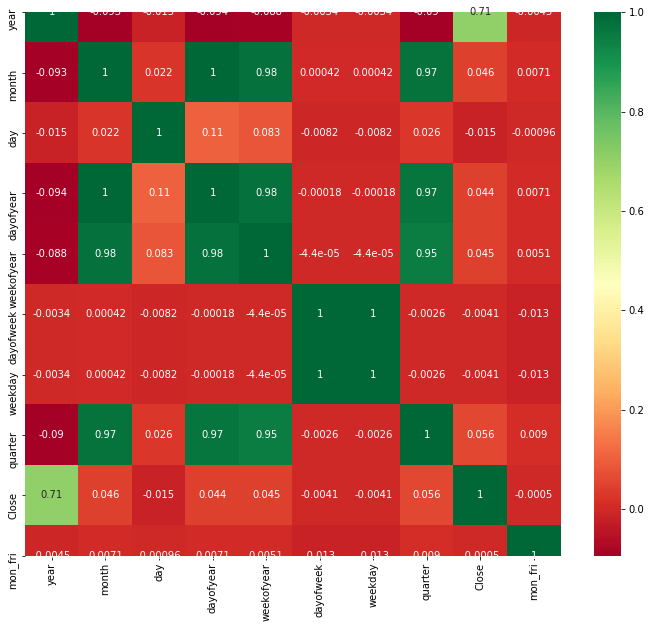

In [16]:
# HEATMAP FOR ORIGINAL DATA
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.

sns.heatmap(new_data1.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

# CREATE TRAIN AND TEST DATA FOR 15 DAYS PREDICTION

In [17]:
totalrowno = len(new_data1)
#print(totalrowno)

# Split the data into training/testing sets
train = new_data1[:(totalrowno-15)] 
test = new_data1[(totalrowno-15):] 

# X_TRAIN WITHOUT CLOSE PRICE AND DATE
# TRAIN USING OTHER FEATURES LIKE day,dayofweek......mon_fri
X_train = train.drop(['Close','Date'], axis=1) 
X_test = test.drop(['Close','Date'], axis=1) 

# Split the targets into training/testing sets
y_train = train['Close'] 
y_test = test['Close']

print('X TRAIN DATA ', X_train.shape)
print('Y TRAIN DATA ', y_train.shape)
print('X TEST DATA ', X_test.shape)
print('Y TRAIN DATA ', y_test.shape)

X TRAIN DATA  (2085, 9)
Y TRAIN DATA  (2085,)
X TEST DATA  (15, 9)
Y TRAIN DATA  (15,)


In [18]:
#importing libraries 
from sklearn.preprocessing import MinMaxScaler 

#Transforms features by scaling each feature to a given range.
#This estimator scales and translates each feature individually 
#such that it is in the given range on the training set, e.g. between zero and one.
scaler = MinMaxScaler(feature_range=(0, 1)) 
#print(scaler)

#scaling data 
x_train_scaled = scaler.fit_transform(X_train) 
x_test_scaled = scaler.fit_transform(X_test) 
 
#x_train_scaled_df = pd.DataFrame(x_train_scaled) 
#x_train_scaled_df.to_csv('01_8.KNN_X_Scale_TrainData.csv')
#x_test_scaled_df = pd.DataFrame(x_test_scaled)
#x_test_scaled_df.to_csv('01_9.KNN_X_Scale_TestData.csv')

# CREATE KNN MODEL FOR 15 DAYS PREDICTION

In [19]:
#using gridsearch to find the best parameter 
from sklearn import neighbors 

params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]} 
knn = neighbors.KNeighborsRegressor()
print(knn)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')


In [20]:
from sklearn.model_selection import GridSearchCV 

#For deciding the value of k,use gridsearch to find the best value
model = GridSearchCV(knn, params, cv=8) 

#fit the model 
model.fit(x_train_scaled,y_train) 

print(model.best_params_)

{'n_neighbors': 4}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# 15 DAYS PREDICTION

In [21]:
#make predictions
stcokclose_preds = model.predict(x_test_scaled) 

In [22]:
df_15days = new_data1.loc[(len(new_data1) - 15):,['Date','Close']]
df_15days['PClose'] = stcokclose_preds[(len(stcokclose_preds) - 15):]
df_15days.head(15)
#df_15days.to_csv('3.1.KNN_15DaysPrediction.csv')

,Date,Close,PClose
2085,2018-12-14,212.35,102.9750
2086,2018-12-17,210.05,109.3750
2087,2018-12-18,210.10,114.5750
2088,2018-12-19,210.15,109.2500
2089,2018-12-20,210.20,109.2500
2090,2018-12-21,215.40,101.9250
2091,2018-12-24,219.05,108.4500
2092,2018-12-26,218.55,104.9250
2093,2018-12-27,220.05,104.9250
2094,2018-12-28,220.80,105.7875


# ERROR CLACULATION

In [23]:
#calculate rmse
#MSE (Mean Squared Error) = np.mean((y_test - y_predtest)**2)
#RMSE (Root Mean Squared Error) = np.sqrt(MSE)

x = np.power((np.array(df_15days['Close'])-df_15days['PClose']),2)
mse = np.mean(x)
rmse = np.sqrt(mse)
print ('15 DAYS LINEAR REGRESSION MODEL- RMSE VALUE ', rmse)

15 DAYS LINEAR REGRESSION MODEL- RMSE VALUE  89.8367682359697


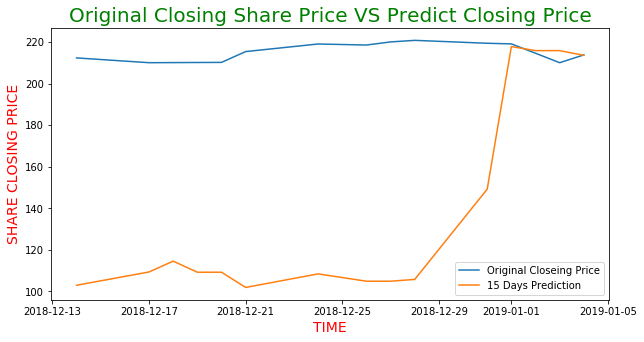

In [26]:
# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(df_15days['Date'],df_15days['Close'], label='Original Closeing Price')
ax.plot(df_15days['Date'],df_15days['PClose'], label='15 Days Prediction')

ax.set_xlabel('TIME',fontsize=14, color='r')
ax.set_ylabel('SHARE CLOSING PRICE',fontsize=14, color='r')
ax.set_title('Original Closing Share Price VS Predict Closing Price', fontsize=20, color='g')
ax.legend()

# CREATE TRAIN AND TEST DATA FOR 45 DAYS PREDICTION

In [22]:
totalrowno = len(new_data1)
#print(totalrowno)

# Split the data into training/testing sets
train = new_data1[:(totalrowno-45)] 
test = new_data1[(totalrowno-45):] 

# X_TRAIN WITHOUT CLOSE PRICE AND DATE
# TRAIN USING OTHER FEATURES LIKE day,dayofweek......mon_fri
X_train = train.drop(['Close','Date'], axis=1) 
X_test = test.drop(['Close','Date'], axis=1) 

# Split the targets into training/testing sets
y_train = train['Close'] 
y_test = test['Close']

print('X TRAIN DATA ', X_train.shape)
print('Y TRAIN DATA ', y_train.shape)
print('X TEST DATA ', X_test.shape)
print('Y TRAIN DATA ', y_test.shape)

X TRAIN DATA  (2055, 9)
Y TRAIN DATA  (2055,)
X TEST DATA  (45, 9)
Y TRAIN DATA  (45,)


In [23]:
#importing libraries 
from sklearn.preprocessing import MinMaxScaler 

#Transforms features by scaling each feature to a given range.
#This estimator scales and translates each feature individually 
#such that it is in the given range on the training set, e.g. between zero and one.
scaler = MinMaxScaler(feature_range=(0, 1)) 
#print(scaler)

#scaling data 
x_train_scaled = scaler.fit_transform(X_train) 
x_test_scaled = scaler.fit_transform(X_test) 
 
#x_train_scaled_df = pd.DataFrame(x_train_scaled) 
#x_train_scaled_df.to_csv('01_8.KNN_X_Scale_TrainData.csv')
#x_test_scaled_df = pd.DataFrame(x_test_scaled)
#x_test_scaled_df.to_csv('01_9.KNN_X_Scale_TestData.csv')

In [24]:
#using gridsearch to find the best parameter 
from sklearn import neighbors 

params = {'n_neighbors':[2,3,4,5,6,7,8,9]} 
knn = neighbors.KNeighborsRegressor()
print(knn)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')


In [25]:
from sklearn.model_selection import GridSearchCV 

#For deciding the value of k,use gridsearch to find the best value
model = GridSearchCV(knn, params, cv=8) 

#fit the model 
model.fit(x_train_scaled,y_train) 

print(model.best_params_)

{'n_neighbors': 4}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [26]:
#make predictions
stcokclose_preds = model.predict(x_test_scaled)

In [27]:
df_45days = new_data1.loc[(len(new_data1) - 45):,['Date','Close']]
df_45days['PClose'] = stcokclose_preds[(len(stcokclose_preds) - 45):]
df_45days.head()
#df_45days.to_csv('3.2.KNN 45DaysPrediction.csv')

,Date,Close,PClose
2055,2018-10-31,217.85,118.3500
2056,2018-11-01,217.75,104.6250
2057,2018-11-02,217.65,113.5375
2058,2018-11-05,219.85,122.3250
2059,2018-11-06,213.80,127.2500


In [28]:
#calculate rmse
#MSE (Mean Squared Error) = np.mean((y_test - y_predtest)**2)
#RMSE (Root Mean Squared Error) = np.sqrt(MSE)

x = np.power((np.array(df_45days['Close'])-df_45days['PClose']),2)
mse = np.mean(x)
rmse = np.sqrt(mse)
print ('45 DAYS LINEAR REGRESSION MODEL- RMSE VALUE ', rmse)

45 DAYS LINEAR REGRESSION MODEL- RMSE VALUE  98.42374454156544


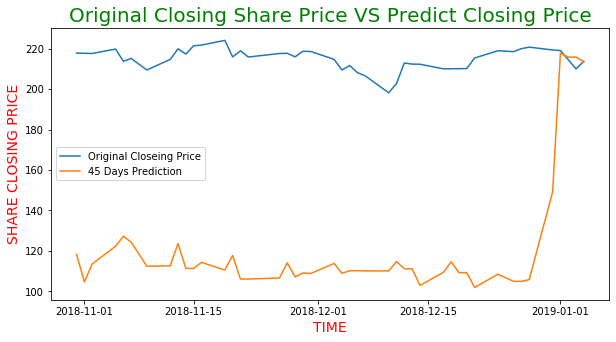

In [29]:
# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(df_45days['Date'],df_45days['Close'], label='Original Closeing Price')
ax.plot(df_45days['Date'],df_45days['PClose'], label='45 Days Prediction')

ax.set_xlabel('TIME',fontsize=14, color='r')
ax.set_ylabel('SHARE CLOSING PRICE',fontsize=14, color='r')
ax.set_title('Original Closing Share Price VS Predict Closing Price', fontsize=20, color='g')
ax.legend()

# CREATE TRAIN AND TEST DATA FOR 90 DAYS PREDICTION

In [30]:
totalrowno = len(new_data1)
#print(totalrowno)

# Split the data into training/testing sets
train = new_data1[:(totalrowno-90)] 
test = new_data1[(totalrowno-90):] 

# X_TRAIN WITHOUT CLOSE PRICE AND DATE
# TRAIN USING OTHER FEATURES LIKE day,dayofweek......mon_fri
X_train = train.drop(['Close','Date'], axis=1) 
X_test = test.drop(['Close','Date'], axis=1) 

# Split the targets into training/testing sets
y_train = train['Close'] 
y_test = test['Close']

print('X TRAIN DATA ', X_train.shape)
print('Y TRAIN DATA ', y_train.shape)
print('X TEST DATA ', X_test.shape)
print('Y TRAIN DATA ', y_test.shape)

X TRAIN DATA  (2010, 9)
Y TRAIN DATA  (2010,)
X TEST DATA  (90, 9)
Y TRAIN DATA  (90,)


In [31]:
#importing libraries 
from sklearn.preprocessing import MinMaxScaler 

#Transforms features by scaling each feature to a given range.
#This estimator scales and translates each feature individually 
#such that it is in the given range on the training set, e.g. between zero and one.
scaler = MinMaxScaler(feature_range=(0, 1)) 
#print(scaler)

#scaling data 
x_train_scaled = scaler.fit_transform(X_train) 
x_test_scaled = scaler.fit_transform(X_test) 
 
#x_train_scaled_df = pd.DataFrame(x_train_scaled) 
#x_train_scaled_df.to_csv('01_8.KNN_X_Scale_TrainData.csv')
#x_test_scaled_df = pd.DataFrame(x_test_scaled)
#x_test_scaled_df.to_csv('01_9.KNN_X_Scale_TestData.csv')

In [32]:
#using gridsearch to find the best parameter 
from sklearn import neighbors 

params = {'n_neighbors':[2,3,4,5,6,7,8,9]} 
knn = neighbors.KNeighborsRegressor()
print(knn)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')


In [33]:
from sklearn.model_selection import GridSearchCV 

#For deciding the value of k,use gridsearch to find the best value
model = GridSearchCV(knn, params, cv=8) 

#fit the model 
model.fit(x_train_scaled,y_train) 

print(model.best_params_)

{'n_neighbors': 4}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [34]:
#make predictions
stcokclose_preds = model.predict(x_test_scaled)

In [35]:
df_90days = new_data1.loc[(len(new_data1) - 90):,['Date','Close']]
df_90days['PClose'] = stcokclose_preds[(len(stcokclose_preds) - 90):]
df_90days.head()
#df_90days.to_csv('3.3.KNN 90DaysPrediction.csv')

,Date,Close,PClose
2010,2018-08-23,235.45,111.7250
2011,2018-08-24,231.00,110.9250
2012,2018-08-27,237.05,112.8125
2013,2018-08-28,233.35,119.2000
2014,2018-08-29,234.55,111.7750


In [36]:
#calculate rmse
#MSE (Mean Squared Error) = np.mean((y_test - y_predtest)**2)
#RMSE (Root Mean Squared Error) = np.sqrt(MSE)

x = np.power((np.array(df_90days['Close'])-df_90days['PClose']),2)
mse = np.mean(x)
rmse = np.sqrt(mse)
print ('90 DAYS LINEAR REGRESSION MODEL- RMSE VALUE ', rmse)

90 DAYS LINEAR REGRESSION MODEL- RMSE VALUE  105.88364983359487


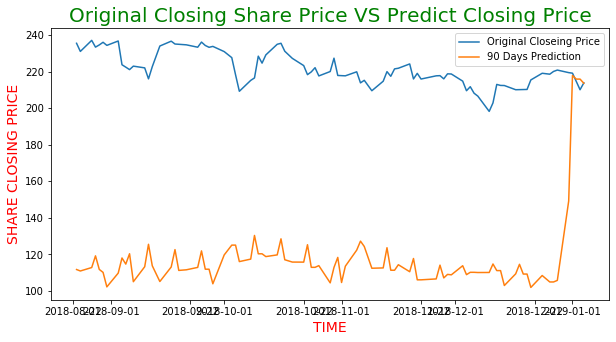

In [37]:
# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(df_90days['Date'],df_90days['Close'], label='Original Closeing Price')
ax.plot(df_90days['Date'],df_90days['PClose'], label='90 Days Prediction')

ax.set_xlabel('TIME',fontsize=14, color='r')
ax.set_ylabel('SHARE CLOSING PRICE',fontsize=14, color='r')
ax.set_title('Original Closing Share Price VS Predict Closing Price', fontsize=20, color='g')
ax.legend()